# Testing of Spectral Element Method using Fourier Series basis

This first chapter introduces the general concept of spectral approximation of
functions. Starting our with Fourier series, and trunkation of the infinite
series. This leads to the Modal Fourier Series method. Next up is using a Nodal
method, meaning define the function based on specific known points and
interpolate between them with the Fourier series method.

## Preparation of the notebook

In [1]:
# Prepare path for import of the spectral element package
import sys, os
sys.path.append(os.path.abspath(os.path.join(os.path.dirname(os.path.abspath("__file__")), '../')))

# Predefined styles for graphs
style_function = dict(linestyle='dotted', linewidth=3, zorder=2)
style_fourier = dict(linestyle='solid', linewidth=2, zorder=1)


## Simple test functions
In general we first wish to define our 

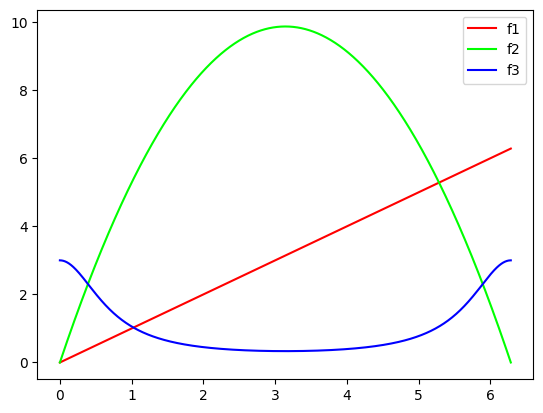

In [2]:
from math import pi
import numpy as np
import matplotlib.pyplot as plt

# Test functions
f1 = lambda x: x
f2 = lambda x: x * (2. * pi - x)
f3 = lambda x: 3. / (5. - 4. * np.cos(1. * x))

# Plot the functions in the interval -1 to 1
pts = np.linspace(0, 2*pi, 1000)
plt.plot(pts, f1(pts), color = [1., .0, .0])
plt.plot(pts, f2(pts), color = [.0, 1., .0])
plt.plot(pts, f3(pts), color = [.0, .0, 1.])
plt.legend(['f1', 'f2', 'f3']);

## Exercise 1.1

> In Fig. 1.3 we showed how the norm of the Fourier truncation error decays with  
> the number of modes. In this problem, plot $P_N f$ for the three functions as  
> a function of x for $N = 4,8,16,32$ and observe the behaviour of the  
> approximations. In particular, observe the well-known Gibbs phenomenon in the  
> neighbourhood of the discontinuities in the periodic extensions of the  
> functions.  

This exercise will show how we get increasingly high precision as we increase  
the number of modes. However, it is also exceedingly clear that the  
f1 is a real challenge, due to the discontinuity across the domain. This leads  
to the gibs oscillations, which are the increasingly rapid modes near the ends  
of the domain.

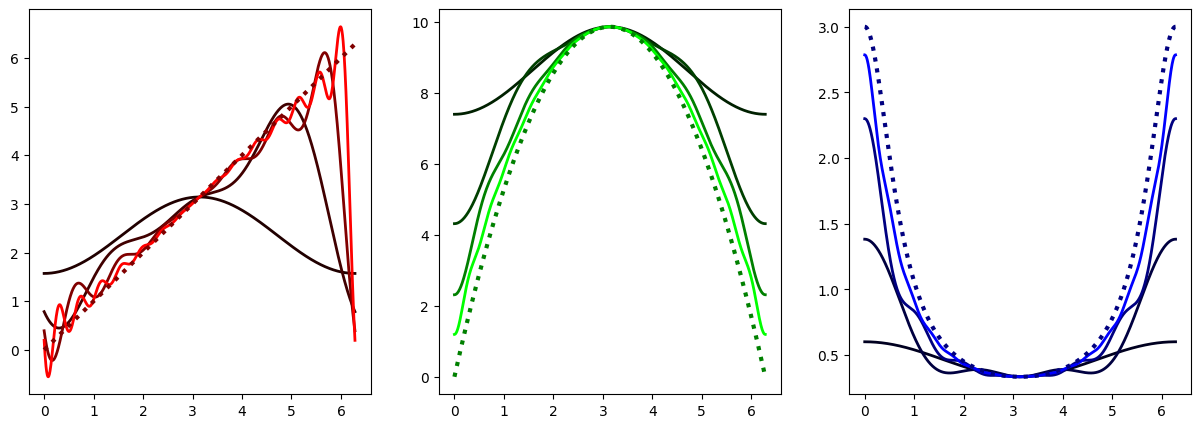

In [3]:
from spectral_elements.fourier import DiscreteFourierCoefficients, FourierInterpolantFromModes

def FourierInterpolationMode(f, N, pts):
    """
    Compute the Fourier interpolant of f at the points pts using N modes
    """
    nodes = np.linspace(0, 2 * pi, N +1)
    nodes = nodes[1:-2]  # Remove the last node to avoid duplication (periodicity)
    coef = DiscreteFourierCoefficients(f(nodes))
    return FourierInterpolantFromModes(coef, pts)

# Compare the interpolant with the original function
N = [4, 8, 16, 32]

style_function = dict(linestyle='dotted', linewidth=3, zorder=2)
style_fourier = dict(linestyle='solid', linewidth=2, zorder=1)

_, sp = plt.subplots(1, 3, figsize=(15, 5))

sp[0].plot(pts, f1(pts), color=[0.5, 0, 0], **style_function)
sp[1].plot(pts, f2(pts), color=[0, 0.5, 0], **style_function)
sp[2].plot(pts, f3(pts), color=[0, 0, 0.5], **style_function)

for n in N:
    sp[0].plot(pts, FourierInterpolationMode(f1, n, pts), color=[n / max(N), 0, 0], **style_fourier)
    sp[1].plot(pts, FourierInterpolationMode(f2, n, pts), color=[0, n / max(N), 0], **style_fourier)
    sp[2].plot(pts, FourierInterpolationMode(f3, n, pts), color=[0, 0, n / max(N)], **style_fourier)


## Exercise 1.2

> To reduce the size of the oscillations seen in the truncated Fourier series for
> non-smooth functions, we often smooth/filter it. The filtered approximation is of the
> form
> 
> $$
> \bar{P}_N f = \sum^{N / 2}_{k=-N / 2} \sigma_k \hat{f} e^{ikx},
> $$
> 
> where σk is the filter function. Typically, the filter function is a smooth low pass
> filter with $\sigma_0 = 1$ and $\sigma_{\pm N/2} = 0$. An example is the raised
> cosine filter,
> 
> $$
> \sigma_k = \frac{1 + \cos( 2 k \pi / N)}{2}, \quad k = −N/2,...,N/2.
> $$
> 
> To see the effects of filtering, plot the Fourier truncation approximation of
> the function
> $$
> f (x) = \begin{cases} 
>     1, & \frac{\pi}{2} < x \leq \frac{3 \pi}{2} \\
>     0, & 0 < x \leq \frac{\pi}{2} \text{and} \frac{3 \pi}{2} < x \leq 2\pi
>     \end{cases}
> $$
> with and without the raised cosine filter. (The Fourier coefficients for this function
> are
> $$
> \hat{f}k =
> \begin{cases}
> π, & k = 0,\\
> 0, & k \neq 0, even,\\
> \frac{ (−1)^{(k−1)/2} }{k}, & k \neq 0, odd.\\
> \end{cases}
> $$
> To learn more about filtering, see [7]

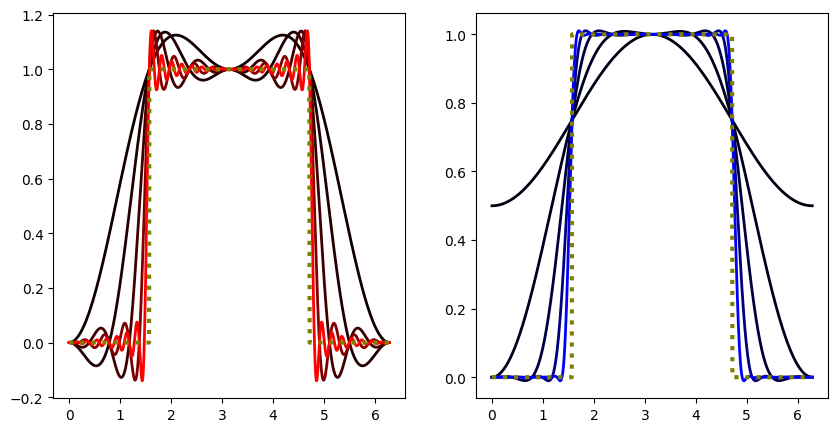

In [4]:
from math import floor
import numpy as np

def RaisedCosineFilter(N):
    """
    Compute the raised cosine filter of order N
    """

    k_min = -floor(N / 2)
    k_max = floor(N / 2)
    K = np.linspace(k_min, k_max, N+1)

    filter = np.zeros(N+1)
    for k_i in range(N+1):
        k = K[k_i]
        if k == 0:
            filter[k_i] = 1.
        elif k == k_min or k == k_max:
            filter[k_i] = 0.
        else:
            filter[k_i] = 0.5 * (1. + np.cos(2 * pi * k / N))

    return filter

def f(x):
    if isinstance(x, float):
        fun = 1 if (pi/2 < x <= 3*pi/2) else 0.
        return fun
    else:
        fun = x.copy()
        for i in range(len(x)):
            fun[i] = 1 if (pi/2 < x[i] <= 3*pi/2) else 0.
        return fun

# Compare the interpolant with the original function
N = [4, 8, 16, 32, 64]

_, sp = plt.subplots(1, 2, figsize=(10, 5))

func = pts.copy()
for i in range(len(pts)):
    func[i] = f(pts[i])

sp[0].plot(pts, func, color=[0.5, 0.5, 0], **style_function)
sp[1].plot(pts, func, color=[0.5, 0.5, 0], **style_function)

for n in N:
    nodes = np.linspace(0, 2 * pi, n +3)
    nodes = nodes[1:-2]  # Remove the last node to avoid duplication (periodicity)

    clean = FourierInterpolantFromModes(DiscreteFourierCoefficients(f(nodes)), pts)
    filtered = FourierInterpolantFromModes(RaisedCosineFilter(n) * DiscreteFourierCoefficients(f(nodes)), pts)

    sp[0].plot(pts, clean, color=[n / max(N), 0, 0], **style_fourier)
    sp[1].plot(pts, filtered, color=[0, 0, n / max(N)], **style_fourier)


## Exercise 1.3 

> Equation (1.44) establishes that with enough nodes the composite trapezoidal
> rule integrates complex exponentials exactly. Otherwise, it does not. Compute
> and plot the logarithm of the error as a function of N for the following two
> integrals: 
> 
> $$ 
> I1 = \int_0^{2\pi} \cos(10x) dx, \\
> I2 = \int_0^{2\pi} \cos(x)e^{\sin(x)} dx. 
> $$ 
> 
> Note the behavior of the error as a function of N and compare to the usual
> $O(\Delta x^2)$ behaviour for the composite trapezoidal rule.

<!-- Todo: Not done yet -->


## Exercise 1.4

> Repeat Problem 1.1 for $I_Nf$.

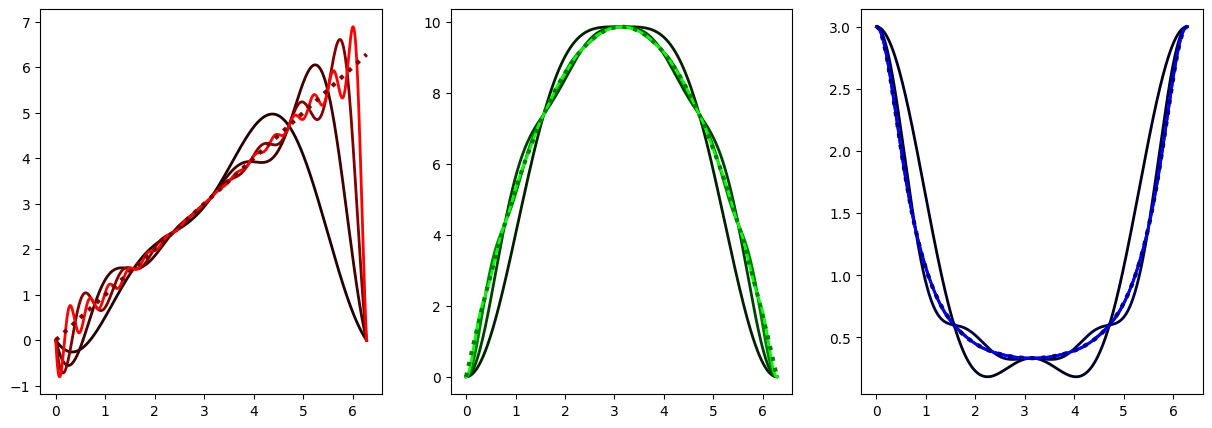

In [5]:
from spectral_elements.fourier import FourierInterpolantFromNodes

def FourierInterpolationNode(f, N, pts):
    """
    Compute the Fourier interpolant of f at the points pts using N Nodes
    """
    nodes = 2 * pi * np.ones(N) / N

    for j in range(N):
        nodes[j] = nodes[j] * j

    return FourierInterpolantFromNodes(pts, nodes, f(nodes))

# Compare the interpolant with the original function
N = [4, 8, 16, 32]

_, sp = plt.subplots(1, 3, figsize=(15, 5))

sp[0].plot(pts, f1(pts), color=[0.5, 0, 0], **style_function)
sp[1].plot(pts, f2(pts), color=[0, 0.5, 0], **style_function)
sp[2].plot(pts, f3(pts), color=[0, 0, 0.5], **style_function)

for n in N:
    sp[0].plot(pts, FourierInterpolationNode(f1, n, pts), color=[n / max(N), 0, 0], **style_fourier)
    sp[1].plot(pts, FourierInterpolationNode(f2, n, pts), color=[0, n / max(N), 0], **style_fourier)
    sp[2].plot(pts, FourierInterpolationNode(f3, n, pts), color=[0, 0, n / max(N)], **style_fourier)


## s

## Misc stuff

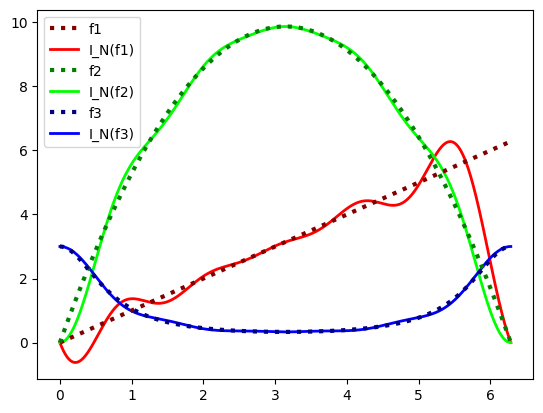

In [6]:
import numpy as np
from spectral_elements.fourier import FourierInterpolantFromNodes

# Compare the interpolant with the original function
N = 10
nodes = np.ndarray([N,])
for j in range(N):
    nodes[j] = 2 * pi * j / N

style_function = dict(linestyle='dotted', linewidth=3, zorder=2)
style_fourier  = dict(linestyle='solid', linewidth=2, zorder=1)

plt.plot(pts, f1(pts), color=[0.5, 0, 0], **style_function)
plt.plot(pts, FourierInterpolantFromNodes(pts, nodes, f1(nodes)), color=[1, 0, 0], **style_fourier)
plt.plot(pts, f2(pts), color=[0, 0.5, 0], **style_function)
plt.plot(pts, FourierInterpolantFromNodes(pts, nodes, f2(nodes)), color=[0, 1, 0], **style_fourier)
plt.plot(pts, f3(pts),color=[0, 0, 0.5], **style_function)
plt.plot(pts, FourierInterpolantFromNodes(pts, nodes, f3(nodes)), color=[0, 0, 1], **style_fourier)

plt.legend(['f1', 'I_N(f1)', 'f2', 'I_N(f2)', 'f3', 'I_N(f3)']);

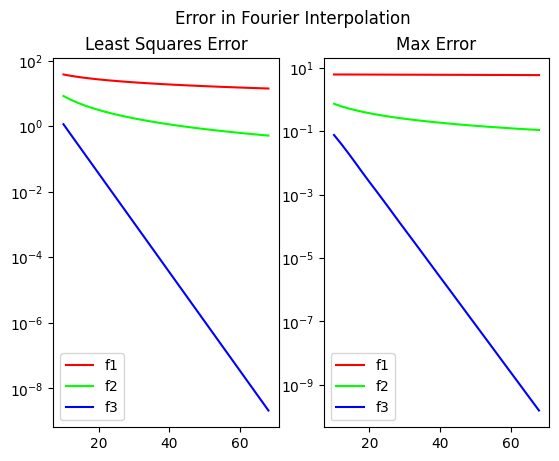

In [10]:
N = range(10, 70, 2)
pts = np.linspace(0, 2 * pi, 1001)
pts = pts[0:-1]

F1 = f1(pts)
F2 = f2(pts)
F3 = f3(pts)

error1_2_norm = np.zeros(len(N))
error2_2_norm = np.zeros(len(N))
error3_2_norm = np.zeros(len(N))

error1_max_norm = np.zeros(len(N))
error2_max_norm = np.zeros(len(N))
error3_max_norm = np.zeros(len(N))

# Compare the interpolant with the original function
for n_i, n in enumerate(N):

    nodes = np.ndarray([n,])
    for j in range(n):
        nodes[j] = 2 * pi * j / n

    I_N_f1 = FourierInterpolantFromNodes(pts, nodes, f1(nodes))

    error1_2_norm[n_i] = np.linalg.norm(F1 - I_N_f1)
    error1_max_norm[n_i] = np.linalg.norm(F1 - I_N_f1, np.inf)

    I_N_f2 = FourierInterpolantFromNodes(pts, nodes, f2(nodes))
    error2_2_norm[n_i] = np.linalg.norm(F2 - I_N_f2)
    error2_max_norm[n_i] = np.linalg.norm(F2 - I_N_f2, np.inf)

    I_N_f3 = FourierInterpolantFromNodes(pts, nodes, f3(nodes))
    error3_2_norm[n_i] = np.linalg.norm(F3 - I_N_f3)
    error3_max_norm[n_i] = np.linalg.norm(F3 - I_N_f3, np.inf)

_, subplots = plt.subplots(1, 2)

subplots[0].semilogy(N, error1_2_norm, color=[1, 0, 0])
subplots[0].semilogy(N, error2_2_norm, color=[0, 1, 0])
subplots[0].semilogy(N, error3_2_norm, color=[0, 0, 1])

subplots[0].set_title('Least Squares Error')
subplots[0].legend(['f1', 'f2', 'f3']);

subplots[1].semilogy(N, error1_max_norm, color=[1, 0, 0])
subplots[1].semilogy(N, error2_max_norm, color=[0, 1, 0])
subplots[1].semilogy(N, error3_max_norm, color=[0, 0, 1])

subplots[1].set_title('Max Error')
subplots[1].legend(['f1', 'f2', 'f3'])

plt.suptitle('Error in Fourier Interpolation');
